# Data Source https://www.kaggle.com/c/expedia-hotel-recommendations/data



# Loading Data - a random sample of 100,000 records from train and test samples

In [1]:
# selecting 100,000 records from train randomly

import pandas as pd
import random

train_filename = "expedia_train.csv"
n = sum(1 for line in open(train_filename)) - 1 #number of records in file (excludes header)
s = 100000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
train = pd.read_csv(train_filename, skiprows=skip)

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  100000 non-null  object 
 1   site_name                  100000 non-null  int64  
 2   posa_continent             100000 non-null  int64  
 3   user_location_country      100000 non-null  int64  
 4   user_location_region       100000 non-null  int64  
 5   user_location_city         100000 non-null  int64  
 6   orig_destination_distance  64000 non-null   float64
 7   user_id                    100000 non-null  int64  
 8   is_mobile                  100000 non-null  int64  
 9   is_package                 100000 non-null  int64  
 10  channel                    100000 non-null  int64  
 11  srch_ci                    99861 non-null   object 
 12  srch_co                    99861 non-null   object 
 13  srch_adults_cnt            100

In [3]:
# selecting 100,000 records from destinations randomly.

dest_filename = "expedia_destinations.csv"
n = sum(1 for line in open(dest_filename)) - 1 #number of records in file (excludes header)
s = 50000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
dest = pd.read_csv(dest_filename, skiprows=skip)

In [4]:
dest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 150 entries, srch_destination_id to d149
dtypes: float64(149), int64(1)
memory usage: 57.2 MB


# Exploratory Analysis of Train dataset

## Step 1: Removing unnecessary columns, creating new features based on existing ones and filling missing values

In [5]:
# Here I will be Extracting relevant information from date_time, checkin date and checkout date.

# The relevant information is: Number of days of stay, number of days between booking, check in day, check in month and check out year

# Function for that is as follows

def convert_date_into_days(df):
    df['srch_ci'] = pd.to_datetime(df['srch_ci'])
    df['srch_co'] = pd.to_datetime(df['srch_co'])
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    df['stay_duration'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[D]')
    df['days_between_booking'] = (df['srch_ci'] - df['date_time']).astype('timedelta64[D]')
    
    # For hotel check-in
    # Month, Year, Day
    df['checkin_day'] = df["srch_ci"].apply(lambda x: x.day)
    df['checkin_month'] = df["srch_ci"].apply(lambda x: x.month)
    df['checkin_year'] = df["srch_ci"].apply(lambda x: x.year)

In [6]:
# Applying above function

convert_date_into_days(train)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  100000 non-null  datetime64[ns]
 1   site_name                  100000 non-null  int64         
 2   posa_continent             100000 non-null  int64         
 3   user_location_country      100000 non-null  int64         
 4   user_location_region       100000 non-null  int64         
 5   user_location_city         100000 non-null  int64         
 6   orig_destination_distance  64000 non-null   float64       
 7   user_id                    100000 non-null  int64         
 8   is_mobile                  100000 non-null  int64         
 9   is_package                 100000 non-null  int64         
 10  channel                    100000 non-null  int64         
 11  srch_ci                    99861 non-null   datetime6

<AxesSubplot:>

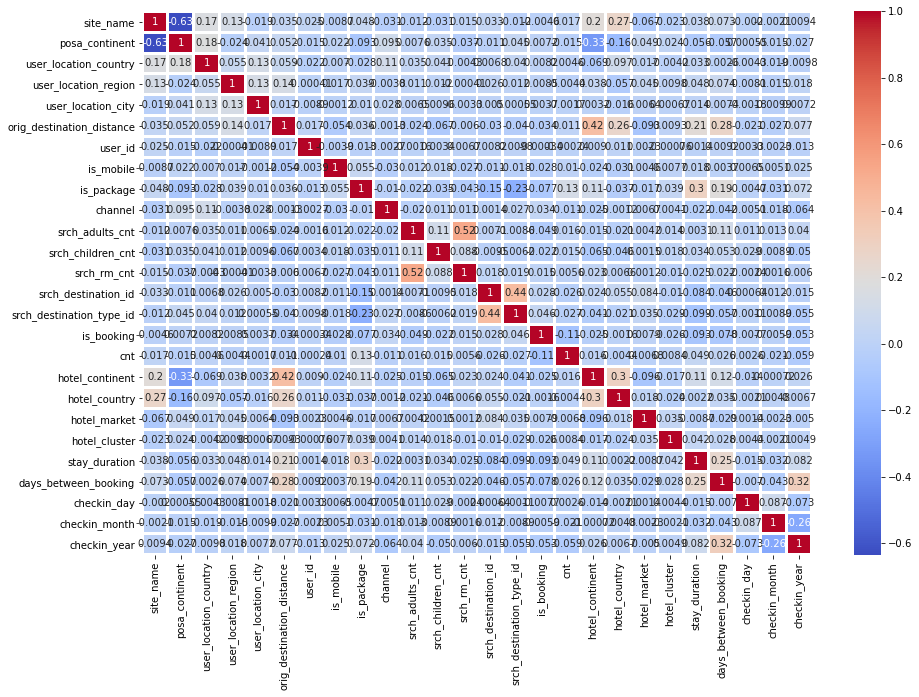

In [8]:
# Correlation matrix of the dataset 

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(train.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

# We can remove highly correlated values, with value 0.5 or greater. These values are srch_adults_cnt, srch_rm_cnt

In [9]:
# Dropping unnecessary columns: 

# we don't need the id of the user for statistical analysis, so dropping user_id 

# we extracted relevant data from the following columns, date_time, srch_ci, and srch_co, so we can drop these as well

# Lastly, from the correlation matrix, we can drop highly correlated, greater than 0.5, values - srch_adults_cnt, srch_rm_cnt

user_id = train['user_id']
columns = ['date_time', 'srch_ci', 'srch_co','user_id', 'srch_adults_cnt', 'srch_rm_cnt' ]
train.drop(columns=columns,axis=1,inplace=True)
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   site_name                  100000 non-null  int64  
 1   posa_continent             100000 non-null  int64  
 2   user_location_country      100000 non-null  int64  
 3   user_location_region       100000 non-null  int64  
 4   user_location_city         100000 non-null  int64  
 5   orig_destination_distance  64000 non-null   float64
 6   is_mobile                  100000 non-null  int64  
 7   is_package                 100000 non-null  int64  
 8   channel                    100000 non-null  int64  
 9   srch_children_cnt          100000 non-null  int64  
 10  srch_destination_id        100000 non-null  int64  
 11  srch_destination_type_id   100000 non-null  int64  
 12  is_booking                 100000 non-null  int64  
 13  cnt                        100

In [10]:
# Check the percentage of Nan in dataset

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train['hotel_cluster'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
orig_destination_distance,36000,0.36000
checkin_year,139,0.00139
checkin_month,139,0.00139
checkin_day,139,0.00139
days_between_booking,139,0.00139
stay_duration,139,0.00139
is_booking,0,0.00000
hotel_cluster,0,0.00000
hotel_market,0,0.00000
hotel_country,0,0.00000


Now, we have  to fill the missing values in:

1. Original Destination Distance
2. Checkin Year
3. Checkin Month
4. Checkin Day
5. Days Between Booking
6. Stay Duration

For this we will fill NaN of Checkin day, Checkin Month, Checkin Year, Stay Duration, and No of days between booking with value of max occurence

In [11]:
# Finding max occurence

print("Checking Day which has max occurrence is: ",train['checkin_day'].value_counts()) # 26th day
print("Checking Month which has max occurrence is: ", train['checkin_month'].value_counts()) # 12th month
print("Checking Year which has max occurrence is: ", train['checkin_year'].value_counts()) # 2014
print("Stay Duration which has max occurrence is: ", train['stay_duration'].value_counts()) # 1 day
print("No of days between booking which has max occurrence is: ", train['days_between_booking'].value_counts()) # 0 days

Checking Day which has max occurrence is:  26.0    3796
27.0    3691
25.0    3543
28.0    3529
24.0    3527
23.0    3400
22.0    3348
21.0    3344
1.0     3310
19.0    3303
20.0    3272
30.0    3267
13.0    3259
18.0    3210
3.0     3201
12.0    3197
29.0    3181
14.0    3176
17.0    3175
15.0    3170
4.0     3167
2.0     3144
10.0    3135
16.0    3131
11.0    3107
8.0     3055
6.0     3008
5.0     3007
7.0     2971
9.0     2971
31.0    2266
Name: checkin_day, dtype: int64
Checking Month which has max occurrence is:  12.0    11533
8.0     11249
7.0      9729
10.0     9344
9.0      8713
11.0     8560
6.0      7795
5.0      7564
4.0      6754
3.0      6683
1.0      6508
2.0      5429
Name: checkin_month, dtype: int64
Checking Year which has max occurrence is:  2014.0    62230
2013.0    26122
2015.0    11505
2016.0        4
Name: checkin_year, dtype: int64
Stay Duration which has max occurrence is:   1.0      26717
 2.0      20339
 3.0      17374
 4.0      12051
 5.0       6980
 7.0      

In [12]:
# Filling the missing value with max occurence 

train['checkin_day'] = train['checkin_day'].fillna(26.0)
train['checkin_month'] = train['checkin_month'].fillna(12.0)
train['checkin_year'] = train['checkin_year'].fillna(2014.0)
train['stay_duration'] = train['stay_duration'].fillna(1.0)
train['days_between_booking'] = train['days_between_booking'].fillna(0.0)

In [13]:
# For orig_destination_distance, Filling average values in place for nan, filling with mean

train['orig_destination_distance'].fillna(train['orig_destination_distance'].mean(), inplace=True)

In [14]:
# Checking missing data again and there is none as expected

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train['hotel_cluster'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
site_name,0,0.0
is_booking,0,0.0
checkin_month,0,0.0
checkin_day,0,0.0
days_between_booking,0,0.0
stay_duration,0,0.0
hotel_cluster,0,0.0
hotel_market,0,0.0
hotel_country,0,0.0
hotel_continent,0,0.0


## Step 2: Checking for outliers

In [15]:
# Based on domain knowledge, considering most data is encoded as numeric, we can only truly identify outliers for (because the
# the rest of the data can have any number of values, and there is no way for us to tell which ones are valid):

# orig_destination_distance

# is_mobile

# is_package

# srch_children_cnt

# checkin_month

# checkin_day

# stay_duration

# days_between_booking

# is_booking

# checkin_year

C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='orig_destination_distance'>

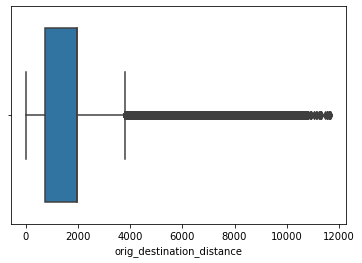

In [16]:
sns.boxplot(train['orig_destination_distance']) # no outliers based on understanding of domain knowledge of distance


C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_mobile'>

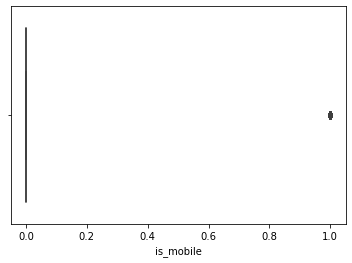

In [17]:
sns.boxplot(train['is_mobile']) # 0 and 1 as expected


C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_package'>

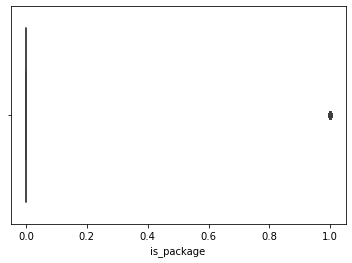

In [18]:
sns.boxplot(train['is_package']) # 0 and 1 as expected


C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='srch_children_cnt'>

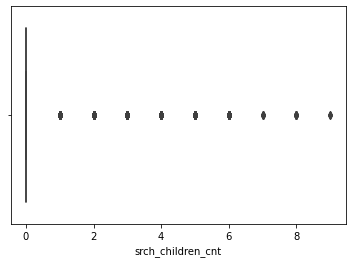

In [19]:
sns.boxplot(train['srch_children_cnt']) # Max of 9 children is possible


C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='checkin_month'>

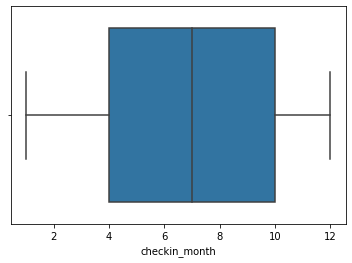

In [20]:
sns.boxplot(train['checkin_month']) # 12 months as expected


C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='checkin_day'>

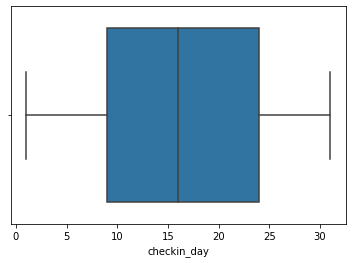

In [21]:
sns.boxplot(train['checkin_day']) # 31 days as expected


C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stay_duration'>

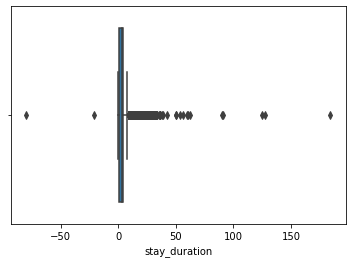

In [22]:
sns.boxplot(train['stay_duration']) # should probably drop some values here 

# as it is not reasonable to be staying more than 20 days for vacation (generally speaking)


C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_booking'>

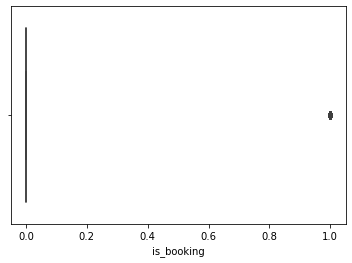

In [23]:
sns.boxplot(train['is_booking']) # 0 and 1 as expected


C:\Users\prate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='checkin_year'>

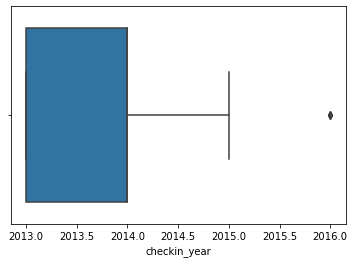

In [24]:
sns.boxplot(train['checkin_year']) # 2013 to 2018 is reasonable

In [25]:
print("Number of days stayed and their occurence: ", train['stay_duration'].value_counts())
# will be dropping everything that has occurred only 5 times or less 


Number of days stayed and their occurence:   1.0      26856
 2.0      20339
 3.0      17374
 4.0      12051
 5.0       6980
 7.0       5621
 6.0       4738
 8.0       1687
 9.0       1028
 10.0       788
 14.0       539
 0.0        385
 11.0       384
 13.0       301
 12.0       283
 15.0       131
 16.0        81
 21.0        64
 20.0        46
 18.0        45
 19.0        42
 28.0        40
 17.0        40
 22.0        25
 25.0        23
 27.0        13
 23.0        12
 26.0        12
 24.0        11
 29.0         9
 32.0         8
 30.0         8
 33.0         7
 31.0         5
 36.0         4
 34.0         2
 50.0         2
 54.0         1
 35.0         1
-80.0         1
 56.0         1
 127.0        1
 184.0        1
 91.0         1
 38.0         1
-21.0         1
 61.0         1
 39.0         1
 60.0         1
 42.0         1
 125.0        1
 90.0         1
 62.0         1
Name: stay_duration, dtype: int64


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   site_name                  100000 non-null  int64  
 1   posa_continent             100000 non-null  int64  
 2   user_location_country      100000 non-null  int64  
 3   user_location_region       100000 non-null  int64  
 4   user_location_city         100000 non-null  int64  
 5   orig_destination_distance  100000 non-null  float64
 6   is_mobile                  100000 non-null  int64  
 7   is_package                 100000 non-null  int64  
 8   channel                    100000 non-null  int64  
 9   srch_children_cnt          100000 non-null  int64  
 10  srch_destination_id        100000 non-null  int64  
 11  srch_destination_type_id   100000 non-null  int64  
 12  is_booking                 100000 non-null  int64  
 13  cnt                        100

In [27]:
counts = train['stay_duration'].value_counts()
final_train = train[~train['stay_duration'].isin(counts[counts < 5].index)]
final_train.info() # dropped 44 values


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99976 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   site_name                  99976 non-null  int64  
 1   posa_continent             99976 non-null  int64  
 2   user_location_country      99976 non-null  int64  
 3   user_location_region       99976 non-null  int64  
 4   user_location_city         99976 non-null  int64  
 5   orig_destination_distance  99976 non-null  float64
 6   is_mobile                  99976 non-null  int64  
 7   is_package                 99976 non-null  int64  
 8   channel                    99976 non-null  int64  
 9   srch_children_cnt          99976 non-null  int64  
 10  srch_destination_id        99976 non-null  int64  
 11  srch_destination_type_id   99976 non-null  int64  
 12  is_booking                 99976 non-null  int64  
 13  cnt                        99976 non-null  int

### Summary of Data Preparation:

1. Dropped unnecessary columns based on domain knowledge and high correlation
2. Filled Null values with mean and max occurence as dictated by domain knowledge
3. Feature engineering - created new columns based on existing columns
4. Checked and removed 44 outlier rows in stay_duration
5. I did not check for duplicates because presence of duplicates is normal in this data set

# Building Model -  need to predict which “hotel cluster” the user is likely to book, given his (or her) search details

In [28]:
# First checking if anything correlates strongly with hotel cluster. This will help us understand if we should look at particular features more. 

final_train.corr()["hotel_cluster"].sort_values()

# seems like there is no feature with strong correlation to hotel_cluster

srch_destination_type_id    -0.029367
is_booking                  -0.025695
hotel_country               -0.023662
site_name                   -0.023113
hotel_continent             -0.016469
srch_destination_id         -0.010040
user_location_country       -0.004310
checkin_month               -0.002175
user_location_city           0.000690
channel                      0.004109
checkin_day                  0.004385
checkin_year                 0.004778
orig_destination_distance    0.007511
is_mobile                    0.007771
cnt                          0.008375
user_location_region         0.009860
srch_children_cnt            0.017499
posa_continent               0.023750
days_between_booking         0.028199
hotel_market                 0.034715
is_package                   0.039160
stay_duration                0.045753
hotel_cluster                1.000000
Name: hotel_cluster, dtype: float64

In [29]:
# combinations of search destinations, hotel country, hotel market will help finding the hotel cluster

pieces = [final_train.groupby(['srch_destination_id','hotel_country','hotel_market','hotel_cluster'])['is_booking'].agg(['sum','count'])]
agg = pd.concat(pieces).groupby(level=[0,1,2,3]).sum()
agg.dropna(inplace=True)
agg.head()

sum  count
srch_destination_id hotel_country hotel_market hotel_cluster            
1                   76            1537         20               1      1
4                   7             246          25               1      2
                                               62               0      1
8                   50            416          42               0      1
                                               48               0      3

In [30]:
agg['sum_and_cnt'] = 0.85*agg['sum'] + 0.15*agg['count']
agg = agg.groupby(level=[0,1,2]).apply(lambda x: x.astype(float)/x.sum())
agg.reset_index(inplace=True)
agg.head()

,srch_destination_id,hotel_country,hotel_market,hotel_cluster,sum,count,sum_and_cnt
0,1,76,1537,20,1.0,1.000000,1.000000
1,4,7,246,25,1.0,0.666667,0.884615
2,4,7,246,62,0.0,0.333333,0.115385
3,8,50,416,42,NaN,0.166667,0.166667
4,8,50,416,48,NaN,0.500000,0.500000


In [31]:
agg_pivot = agg.pivot_table(index=['srch_destination_id','hotel_country','hotel_market'], columns='hotel_cluster', values='sum_and_cnt').reset_index()
agg_pivot.head()

hotel_cluster,srch_destination_id,hotel_country,hotel_market,0,1,2,3,4,5,6,...,90,91,92,93,94,95,96,97,98,99
0,1,76,1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,7,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,50,416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,50,824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,27,1434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Merging this new data with destination data to help with model building on hotel cluster

final_train = pd.merge(final_train, dest, how='left', on='srch_destination_id')
final_train = pd.merge(final_train, agg_pivot, how='left', on=['srch_destination_id','hotel_country','hotel_market'])
final_train.fillna(0, inplace=True)
final_train.shape

(99976, 272)

In [33]:
# Only want booking events

final_train = final_train.loc[final_train['is_booking'] == 1]

In [34]:
# Train and test set x and y from training set

X = final_train.drop(['hotel_cluster', 'is_booking'], axis=1)
y = final_train.hotel_cluster

In [35]:
# Naive Bayes

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import numpy as np
clf = make_pipeline(preprocessing.StandardScaler(), GaussianNB(priors=None))
np.mean(cross_val_score(clf, X, y, cv=10))


# 14% Accuracy

C:\Users\prate\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.14800981486435377

In [36]:
# K-Nearest Neighbor Classfier

from sklearn.neighbors import KNeighborsClassifier
clf = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=5))
np.mean(cross_val_score(clf, X, y, cv=10, scoring='accuracy'))

# 31% Accuracy

C:\Users\prate\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.31734282226547483

In [37]:
# SVM Classifier 

from sklearn import svm
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(decision_function_shape='ovo'))
np.mean(cross_val_score(clf, X, y, cv=10))

# 38% accuracy

C:\Users\prate\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


0.3809352717075466

### Summary of Model Building

I built the models by merging destination data with a cleaned and modified training data. The training data was modified, grouped by and pivoted based on relevant data points. After that it was split into training and test sets.

Our model accuracies are as follows:

1. Naive Bayes - 14% Accuracy
2. K-Nearest Neighbor - 31% Accuracy
3. SVM Classifier - 38% Accuracy